<a href="https://colab.research.google.com/github/stochasticats/imdb-review-sentiment-classifier/blob/master/imdb_movie_sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDb Movie Review Sentiment Classification
This Google colab notebook is for developing a deep learning model to classify movie reviews as positive or negative using the data set provided here http://ai.stanford.edu/~amaas/data/sentiment/

First we establish the libraries to be used.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
print(tf.__version__)
import os
import shutil
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2.2.0


We download the zipped data from ai.stanford

In [2]:
!wget "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

--2020-06-01 03:12:35--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  57.4MB/s    in 1.4s    

2020-06-01 03:12:36 (57.4 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [3]:
!tar -xvf "/content/aclImdb_v1.tar.gz"

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclImdb/train/unsup/4

Here I establish stopwords, these are words that will add no meaning to the reviews

In [0]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

Let's load the training data, which is conveniently in two folders based on the sentiment classification.

In [0]:
loc = '/content/aclImdb/train/pos'
os.chdir(loc)
filelist = os.listdir()

reviews_pos = []
labels_pos = []

for f in filelist:
  with open (f, "r") as myfile:
    labels_pos.append(1)
    review = myfile.read()
    for word in stopwords:
            token = " " + word + " "
            review = review.replace(token, " ")
            review = review.replace("  ", " ")
    reviews_pos.append(review)

loc = '/content/aclImdb/train/neg'
os.chdir(loc)
filelist = os.listdir()

reviews_neg = []
labels_neg = []

for f in filelist:
  with open (f, "r") as myfile:
    labels_neg.append(0)
    review = myfile.read()
    for word in stopwords:
            token = " " + word + " "
            review = review.replace(token, " ")
            review = review.replace("  ", " ")
    reviews_neg.append(review)

In [8]:
randn = random.randint(0,len(reviews_pos))

print("Length of reviews that are positive:")
print(len(reviews_pos))
print("Example of a positive review:")
print(reviews_pos[randn])
print("The label:")
print(labels_pos[randn])
print("Length of reviews that are positive:")
print(len(reviews_neg))
print("Example of a negative review:")
print(reviews_neg[randn])
print("The label:")
print(labels_neg[randn])

Length of reviews that are positive:
12500
Example of a positive review:
Simply imaginatively filmed studio-set performance short, perfect match music images defines coolness cool hipness hip. The precise visual musical arrangements give lie claim record jam session: is, pop video - every bit stylised knowing implies, better it. Among best music films ever made, almost certainly cinematic. These cats solid gone, daddy-o ...
The label:
1
Length of reviews that are positive:
12500
Example of a negative review:
The movie starts quite intriguing scene, three people drinking making small talk bar. All making bit outrageous stories. As movie unfolds, turns outrageous story true. However, beyond movie not interesting except scene bar scene main secret revealed. This revelation happens barely half time movie frankly, not much left seen. The rest time director lingering god forsaken Russian village full pitiful creepy old ladies. Sure, fascinating bit shocking images, admiring goes way long, sa

We have 25,000 reviews in total, 12,500 positive and 12,500 negative. As we can see, our reviews need some processing for the deep learning model.  We need to take out the digits and special characters.

Here's a function to use to process the data.

In [0]:
import spacy
import re,string,unicodedata

def preprocess(text):
    text = re.sub('<[^>]*>', '',text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text=re.sub('[\W]+',' ',text.lower()) +\
       ' '.join(emoticons).replace('-','')  
    return text

In [0]:
reviews = reviews_pos + reviews_neg
labels = labels_pos + labels_neg

In [0]:
denoised_reviews = []

for review in reviews:
  denoised_reviews.append(preprocess(review))

In [0]:
dataframe = pd.DataFrame(
    {'reviews': denoised_reviews,
     'labels': labels,
    })
from sklearn.utils import shuffle
dataframe = shuffle(dataframe).reset_index(drop=True)

In [16]:
dataframe.head(20)

,reviews,labels
0,this film portrait half spastic teenage boy be...,0
1,i m irish i ve living denmark i looking forwar...,0
2,that seem fooling people seeing qualities fil...,0
3,there scene film 42 minute mark among worst i ...,0
4,when i first got n64 i five six i fell love it...,1
5,joel schumaker directs script co wrote group g...,0
6,as celebration christmas evolved years whether...,1
7,plan b strictly by the numbers fare except on...,0
8,one question why first off premise not funny e...,0
9,in tune americana drums along mohawk john ford...,1


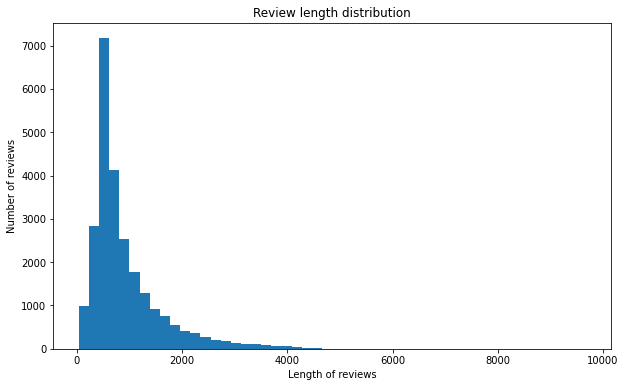

In [17]:
plt.figure(figsize=(10, 6))
plt.hist([len(review) for review in dataframe['reviews']], 50)
plt.xlabel('Length of reviews')
plt.ylabel('Number of reviews')
plt.title('Review length distribution')
plt.show()

In [0]:
vocab_size = 7000
embedding_dim = 64
max_length = 7000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(dataframe['reviews'], dataframe['labels'], test_size=0.2, random_state=42)

KeyError: ignored

In [46]:
print(len(X_train))
print(len(y_train))
print(len(X_valid))
print(len(y_valid))

20000
20000
5000
5000


In [47]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

X_train_seqs = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_seqs, padding=padding_type, maxlen=max_length)

print(len(X_train_seqs[0]))
print(len(X_train_padded[0]))

print(len(X_train_seqs[600]))
print(len(X_train_padded[600]))

print(len(X_train_seqs[10000]))
print(len(X_train_padded[10000]))

219
7000
93
7000
142
7000


In [48]:
X_valid_seqs = tokenizer.texts_to_sequences(X_valid)
X_valid_padded = pad_sequences(X_valid_seqs, padding=padding_type, maxlen=max_length)

print(len(X_valid_seqs))
print(X_valid_padded.shape)

5000
(5000, 7000)


In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 7000, 64)          448000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [50]:
num_epochs = 30
history = model.fit(X_train_padded, y_train, epochs=num_epochs, validation_data=(X_valid_padded, y_valid), verbose=2)

Epoch 1/30
625/625 - 19s - loss: 0.6934 - accuracy: 0.4979 - val_loss: 0.6928 - val_accuracy: 0.5070
Epoch 2/30
625/625 - 19s - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6916 - val_accuracy: 0.5070
Epoch 3/30
625/625 - 19s - loss: 0.6727 - accuracy: 0.5726 - val_loss: 0.5699 - val_accuracy: 0.7994
Epoch 4/30
625/625 - 19s - loss: 0.4751 - accuracy: 0.7731 - val_loss: 0.3645 - val_accuracy: 0.8424
Epoch 5/30
625/625 - 19s - loss: 0.3428 - accuracy: 0.8551 - val_loss: 0.3303 - val_accuracy: 0.8640
Epoch 6/30
625/625 - 19s - loss: 0.3036 - accuracy: 0.8781 - val_loss: 0.3802 - val_accuracy: 0.8330
Epoch 7/30
625/625 - 19s - loss: 0.2924 - accuracy: 0.8814 - val_loss: 0.2791 - val_accuracy: 0.8940
Epoch 8/30
625/625 - 19s - loss: 0.2682 - accuracy: 0.8945 - val_loss: 0.2805 - val_accuracy: 0.8902
Epoch 9/30
625/625 - 19s - loss: 0.2566 - accuracy: 0.8977 - val_loss: 0.3422 - val_accuracy: 0.8564
Epoch 10/30
625/625 - 19s - loss: 0.2487 - accuracy: 0.9047 - val_loss: 0.2892 - val_accura

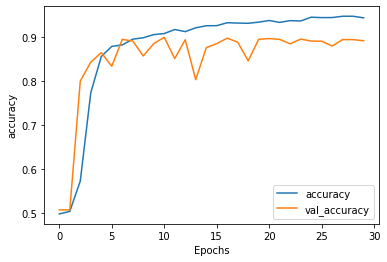

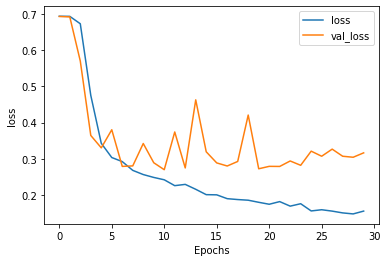

In [51]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
loc = '/content/aclImdb/test/pos'
os.chdir(loc)
filelist = os.listdir()

test_sentences_pos = []
test_labels_pos = []

for f in filelist:
  with open (f, "r") as myfile:
    test_labels_pos.append(1)
    sentence = myfile.read()
    for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
    test_sentences_pos.append(sentence)

loc = '/content/aclImdb/train/neg'
os.chdir(loc)
filelist = os.listdir()

test_sentences_neg = []
test_labels_neg = []

for f in filelist:
  with open (f, "r") as myfile:
    test_labels_neg.append(0)
    sentence = myfile.read()
    for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
    test_sentences_neg.append(sentence)

In [0]:
test_sentences = test_sentences_pos + test_sentences_neg
test_labels = test_labels_pos + test_labels_neg

denoised_test_sentences = []

for sentence in test_sentences:
  denoised_test_sentences.append(preprocess(sentence))

dataframe = pd.DataFrame(
    {'sentences': denoised_test_sentences,
     'labels': test_labels,
    })

In [0]:
dataframe = shuffle(dataframe).reset_index(drop=True)

In [0]:
test_sentences = dataframe['sentences']
test_labels = dataframe['labels']

In [0]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

In [58]:
test_loss, test_acc = model.evaluate(test_padded, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 10s 12ms/step - loss: 0.2433 - accuracy: 0.9139
Test loss: 0.24330346286296844
Test accuracy: 0.9138799905776978
